# Weight and BMI Over Time

This notebook generates a chart of weight and BMI measurements over time from data held in the Health Tracker database and retrieved via the Health Tracker Web Service.

Before attempting to run the notebook:

- Make sure the variables defined in "config.ipynb" are set correctly
- Set the reporting date range and export options in the first code cell

In [8]:
from datetime import date, datetime, timedelta

# Reporting date range
start = date(2024, 12, 1)
end = datetime.now() + timedelta(days=1)

# Whether to export the data to a spreadsheet
export_spreadsheet = True

# Export format for the chart:
# PNG     - export as PNG image
# PDF     - export as PDF file
# <blank> - do not export
chart_export_format = "PNG"

In [9]:
%run ../api.ipynb
%run ../config.ipynb
%run ../export.ipynb

In [10]:
# Log in to the service, get the person ID and retrieve the data
token = authenticate(url, username, password)
person_id = get_person_id(url, token, firstnames, surname)
df = get_weight_measurements(url, token, person_id, start, end)

# Preview the data
df.head()

,weight,bmi,bmiAssessment,bmr,id,personId,date
0,99.0,33.078285,Obese,1888.1523,1,1,2024-12-02
1,99.0,33.078285,Obese,1888.1523,2,1,2024-12-03
2,99.0,33.078285,Obese,1888.1523,3,1,2024-12-04
3,99.0,33.078285,Obese,1888.1523,4,1,2024-12-05
4,99.0,33.078285,Obese,1888.1523,5,1,2024-12-06


In [11]:
import pandas as pd

# Resample the data at weekly and monthly level to produce a cleaner plot
numeric_df = df[["date", "weight", "bmi"]].set_index("date")
monthly_df = numeric_df.resample("MS").mean().reset_index()
weekly_df = numeric_df.resample("W").mean().reset_index()

# Preview the data
monthly_df.head()

,date,weight,bmi
0,2024-12-01,98.400000,32.877811
1,2025-01-01,97.708000,32.646597
2,2025-02-01,97.158824,32.463104
3,2025-03-01,97.364286,32.531754
4,2025-04-01,96.125000,32.117679


In [12]:
# Export the data to a spreadsheet
if export_spreadsheet:
    export_to_spreadsheet("weight_over_time", { "Monthly Trends": monthly_df, "Weekly Trends": weekly_df })


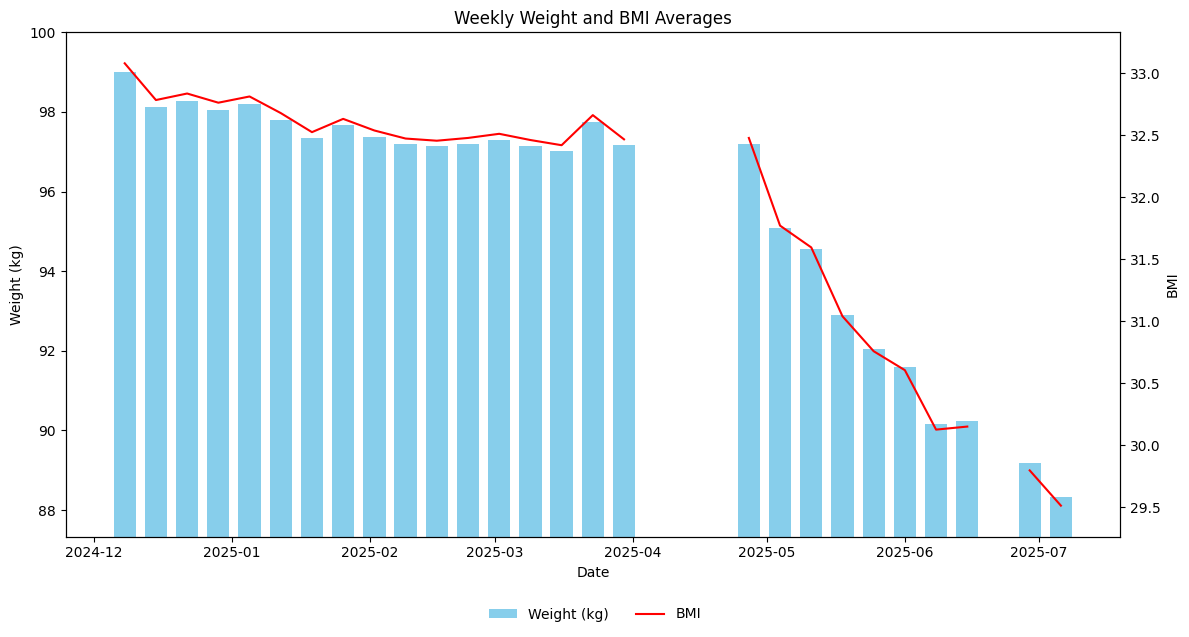

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Determine the Y-axis limits for the bar chart
y_minimum = weekly_df["weight"].min(axis=0) - 1
y_maximum = weekly_df["weight"].max(axis=0) + 1

# Calculate the minimum difference between x-values
x_diffs = np.diff(np.sort(weekly_df["date"]))
min_diff = np.min(x_diffs)

# Set bar width to a fraction of the minimum spacing to leave a small gap between each bar
bar_width = min_diff * 0.9

# Bar chart for monthly weight
ax1.bar(weekly_df["date"], weekly_df["weight"], color="skyblue", label="Weight (kg)", width=5)
ax1.set_xlabel("Date", color="black")
ax1.set_ylabel("Weight (kg)", color="black")
ax1.tick_params(axis="y", labelcolor="black")
ax1.set_ylim(y_minimum, y_maximum)

# Determine the Y-axis limits for the bmi line chart
y_minimum = weekly_df["bmi"].min(axis=0) - 0.25
y_maximum = weekly_df["bmi"].max(axis=0) + 0.25

# Second y-axis for BMI
ax2 = ax1.twinx()
ax2.plot(weekly_df["date"], weekly_df["bmi"], color="red", label="BMI")
ax2.set_ylabel("BMI", color="black")
ax2.tick_params(axis="y", labelcolor="black")
ax2.set_ylim(y_minimum, y_maximum)

# X-axis formatting
plt.xticks(rotation=45)
plt.title("Weekly Weight and BMI Averages")

# Combine both axis legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

fig.legend(
    lines_1 + lines_2,
    labels_1 + labels_2,
    loc="upper center",
    bbox_to_anchor=(0.5, 0.0),
    ncol=2,
    frameon=False
)

fig.tight_layout()

# Export to PNG or PDF, if required
export_chart("weight_over_time", "Weekly", chart_export_format)

# Show the plot
plt.show()

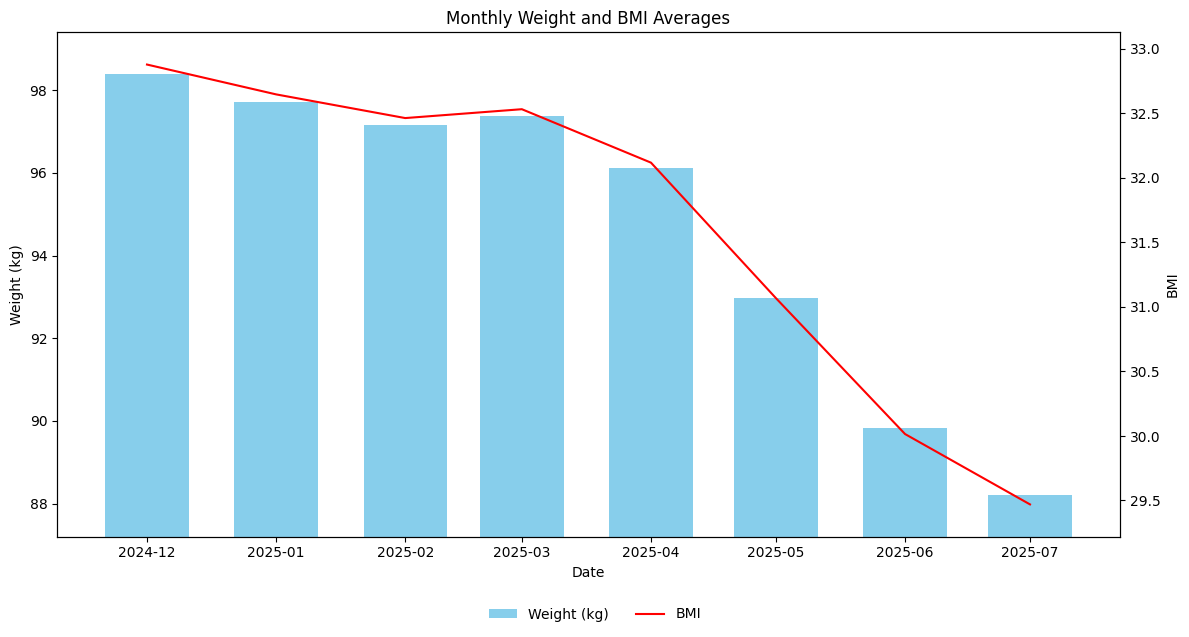

In [14]:
import matplotlib.pyplot as plt

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Determine the Y-axis limits for the bar chart
y_minimum = monthly_df["weight"].min(axis=0) - 1
y_maximum = monthly_df["weight"].max(axis=0) + 1

# Bar chart for monthly weight
ax1.bar(monthly_df["date"], monthly_df["weight"], color="skyblue", label="Weight (kg)", width=20)
ax1.set_xlabel("Date", color="black")
ax1.set_ylabel("Weight (kg)", color="black")
ax1.tick_params(axis="y", labelcolor="black")
ax1.set_ylim(y_minimum, y_maximum)

# Determine the Y-axis limits for the bmi line chart
y_minimum = monthly_df["bmi"].min(axis=0) - 0.25
y_maximum = monthly_df["bmi"].max(axis=0) + 0.25

# Second y-axis for BMI
ax2 = ax1.twinx()
ax2.plot(monthly_df["date"], monthly_df["bmi"], color="red", label="BMI")
ax2.set_ylabel("BMI", color="black")
ax2.tick_params(axis="y", labelcolor="black")
ax2.set_ylim(y_minimum, y_maximum)

# X-axis formatting
plt.xticks(rotation=45)
plt.title("Monthly Weight and BMI Averages")

# Combine both axis legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

fig.legend(
    lines_1 + lines_2,
    labels_1 + labels_2,
    loc="upper center",
    bbox_to_anchor=(0.5, 0.0),
    ncol=2,
    frameon=False
)

fig.tight_layout()

# Export to PNG or PDF, if required
export_chart("weight_over_time", "Monthly", chart_export_format)

# Show the plot
plt.show()